In [251]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

In [212]:
train_data = pd.read_csv("/content/employee_attrition_train.csv")
test_data = pd.read_csv("/content/employee_attrition_test.csv")

In [213]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       893 non-null    float64
 1   Attrition                 1029 non-null   object 
 2   BusinessTravel            1024 non-null   object 
 3   DailyRate                 1002 non-null   float64
 4   Department                1029 non-null   object 
 5   DistanceFromHome          934 non-null    float64
 6   Education                 1029 non-null   int64  
 7   EducationField            1029 non-null   object 
 8   EmployeeCount             1029 non-null   int64  
 9   EmployeeNumber            1029 non-null   int64  
 10  EnvironmentSatisfaction   1029 non-null   int64  
 11  Gender                    1029 non-null   object 
 12  HourlyRate                1029 non-null   int64  
 13  JobInvolvement            1029 non-null   int64  
 14  JobLevel

In [214]:
train_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,893.000000,1002.000000,934.000000,1029.000000,1029.0,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,...,1029.000000,1029.0,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,37.930571,800.528942,9.930407,2.892128,1.0,1024.367347,2.683188,66.680272,2.713314,2.043732,...,2.689990,80.0,0.822157,11.196307,2.782313,2.748299,6.942663,4.215743,2.119534,4.005831
std,9.395978,408.109828,8.421791,1.053541,0.0,606.301635,1.096829,20.474094,0.710146,1.118918,...,1.077767,0.0,0.874662,7.857581,1.283401,0.697278,6.068322,3.658595,3.108651,3.522574
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,458.250000,2.000000,2.000000,1.0,496.000000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,37.000000,801.500000,8.000000,3.000000,1.0,1019.000000,3.000000,67.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,44.000000,1162.000000,16.000000,4.000000,1.0,1553.000000,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.000000,7.000000
max,60.000000,1496.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [215]:
#How many unique values are present in each column
features= train_data.columns
print("Number of unique values are as below:\n")
for i in features:
  uniqueValues=train_data[i].nunique()
  print(i,uniqueValues)

Number of unique values are as below:

Age 39
Attrition 2
BusinessTravel 3
DailyRate 692
Department 3
DistanceFromHome 27
Education 5
EducationField 6
EmployeeCount 1
EmployeeNumber 1029
EnvironmentSatisfaction 4
Gender 2
HourlyRate 71
JobInvolvement 4
JobLevel 5
JobRole 9
JobSatisfaction 4
MaritalStatus 3
MonthlyIncome 963
MonthlyRate 1010
NumCompaniesWorked 10
Over18 1
OverTime 2
PercentSalaryHike 15
PerformanceRating 2
RelationshipSatisfaction 4
StandardHours 1
StockOptionLevel 4
TotalWorkingYears 40
TrainingTimesLastYear 7
WorkLifeBalance 4
YearsAtCompany 32
YearsInCurrentRole 19
YearsSinceLastPromotion 16
YearsWithCurrManager 17


Result:

Below columns are not useful be cause they are having single unique value which does not give any useful information for prediction. Hence they can be dropped

1) EmployeeCount
2) Over18
3) StandardHours
4) EmployeeNumber 

In [216]:
train_data.drop(columns=['EmployeeCount','Over18','StandardHours','EmployeeNumber'],inplace=True,axis=1)

In [217]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())
train_data['DailyRate'] = train_data['DailyRate'].fillna(train_data['DailyRate'].mean())
train_data['BusinessTravel'] = train_data['BusinessTravel'].fillna('Travel_Rarely')
train_data['DistanceFromHome'] = train_data['DistanceFromHome'].fillna(train_data['DistanceFromHome'].mean())
train_data['MaritalStatus'] = train_data['MaritalStatus'].fillna('Married')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1029 non-null   float64
 1   Attrition                 1029 non-null   object 
 2   BusinessTravel            1029 non-null   object 
 3   DailyRate                 1029 non-null   float64
 4   Department                1029 non-null   object 
 5   DistanceFromHome          1029 non-null   float64
 6   Education                 1029 non-null   int64  
 7   EducationField            1029 non-null   object 
 8   EnvironmentSatisfaction   1029 non-null   int64  
 9   Gender                    1029 non-null   object 
 10  HourlyRate                1029 non-null   int64  
 11  JobInvolvement            1029 non-null   int64  
 12  JobLevel                  1029 non-null   int64  
 13  JobRole                   1029 non-null   object 
 14  JobSatis

In [218]:
x = train_data.drop(['Attrition'],axis = 1)
y = train_data['Attrition']

In [219]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y)
y_train

array([0, 0, 1, ..., 1, 0, 0])

In [220]:
# Define the categorical columns
categorical_columns = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
numerical_columns = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
                     'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
                     'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [221]:
preprocessor = make_column_transformer(
    (OneHotEncoder(), categorical_columns),
    (StandardScaler(), numerical_columns)
)

In [222]:
pipeline = make_pipeline(preprocessor)
encoded_x_train = pipeline.fit_transform(x)

In [223]:
#Split the data into training and test sets (its actually the validation set but I wrote test first and don't want to change it :=) )
X_train, X_test, y_train, y_test = train_test_split(encoded_x_train, y_train, test_size=0.2, random_state=42)

In [273]:
#Tuning function for all models

def Tuning(estimator,parameters):
    grid_model = GridSearchCV(estimator,param_grid = parameters,cv = 5)
    grid_model.fit(X_train,y_train)
    print(grid_model.best_params_)
    print(grid_model.best_score_)
    return grid_model.best_estimator_

In [225]:
#Training a Random Forest Classifier
rf = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [100,300,500],
    'min_samples_split': [2,4,6],
    'criterion' : ["gini"]
}

In [226]:
rf = Tuning(rf,param_grid)

{'criterion': 'gini', 'min_samples_split': 2, 'n_estimators': 300}


In [227]:
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Precision:", rf_precision)

Random Forest Accuracy: 0.8737864077669902
Random Forest Precision: 0.8461538461538461


In [310]:
#Training a Logistic Regression model
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [5, 7, 9, 10],  
    'weights': ['uniform', 'distance'],  
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 
    'p': [1, 2]  
}

In [311]:
knn = Tuning(knn, param_grid)

{'algorithm': 'auto', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
0.8396008869179601


In [312]:
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred)
print("KNN Accuracy:", knn_accuracy)
print("KNN Precision:", knn_precision)

KNN Accuracy: 0.8543689320388349
KNN Precision: 0.8571428571428571


In [323]:
#Training a SVM model
support_vector = svm.SVC()
param_grid = {
    'C': [0.1, 0.5, 1, 10],  
    'kernel': ['rbf','poly'],  
    'gamma': ['scale', 'auto'],
    'probability' : [True]
}

In [324]:
support_vector = Tuning(support_vector, param_grid)

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf', 'probability': True}
0.842039911308204


In [325]:
support_vector_pred = support_vector.predict(X_test)
support_vector_accuracy = accuracy_score(y_test, support_vector_pred)
support_vector_precision = precision_score(y_test, support_vector_pred)
print("SVM Accuracy:", support_vector_accuracy)
print("SVM Precision:", support_vector_precision)

SVM Accuracy: 0.8737864077669902
SVM Precision: 0.9090909090909091


In [313]:
#Training a AdaBoost model
adaboost = AdaBoostClassifier()
param_grid = {
    'n_estimators': [50, 100, 200, 400],
    'learning_rate': [0.1, 0.5, 1.0],  
    'estimator': [None, DecisionTreeClassifier(max_depth=3)] 
}

In [314]:
adaboost = Tuning(adaboost, param_grid)

{'estimator': None, 'learning_rate': 0.1, 'n_estimators': 200}
0.8566518847006652


In [315]:
adaboost_pred = adaboost.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, adaboost_pred)
adaboost_precision = precision_score(y_test, adaboost_pred)
print("Adaboost Accuracy:", adaboost_accuracy)
print("Adaboost Precision:", adaboost_precision)

Adaboost Accuracy: 0.8737864077669902
Adaboost Precision: 0.9090909090909091


In [334]:
#Creating a Voting Classifier

voting_clf = VotingClassifier(estimators=[
    ('random_forest', rf),
    ('knn', knn),
    ('adaboost', adaboost),
    ('svm', support_vector)],
    voting = 'hard'
    )

In [335]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('random_forest',
                              RandomForestClassifier(n_estimators=300)),
                             ('knn', KNeighborsClassifier(n_neighbors=9, p=1)),
                             ('adaboost',
                              AdaBoostClassifier(learning_rate=0.1,
                                                 n_estimators=200)),
                             ('svm', SVC(C=1, probability=True))])

In [336]:
y_pred = voting_clf.predict(X_test)
voting_accuracy = accuracy_score(y_test, y_pred)
voting_precision = precision_score(y_test, y_pred)
print("Voting Accuracy:", voting_accuracy)
print("Voting Precision:", voting_precision)

Voting Accuracy: 0.8640776699029126
Voting Precision: 1.0


In [344]:
accuracies = [rf_accuracy, knn_accuracy, support_vector_accuracy, adaboost_accuracy, voting_accuracy]
precisions = [rf_precision, knn_precision, support_vector_precision, adaboost_precision, voting_precision]
models = ['Random Forest','KNN', 'SVM', 'AdaBoost', 'Voting Classifier']

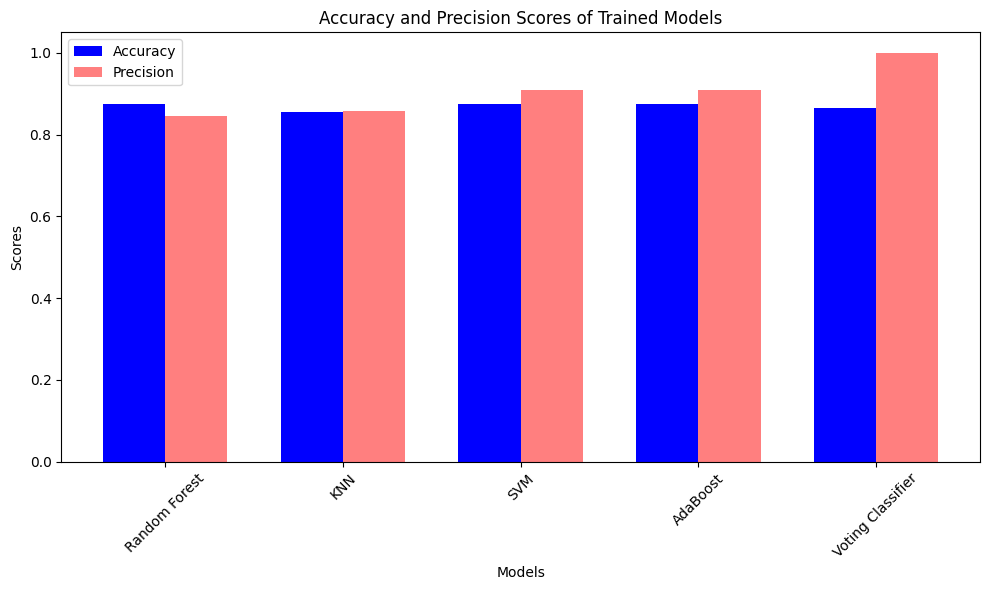

In [346]:
bar_width = 0.35  # Width of each bar
index = np.arange(len(models))  # Index for the x-axis

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(index, accuracies, color='b', width=bar_width, label='Accuracy')
plt.bar(index + bar_width, precisions, color='r', width=bar_width, alpha=0.5, label='Precision')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Accuracy and Precision Scores of Trained Models')
plt.legend()

plt.xticks(index + bar_width/2, models, rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust spacing

plt.show()